In [187]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'  # For high-DPI displays

from importlib import reload
from copy import deepcopy


In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

from imblearn.ensemble import BalancedBaggingClassifier

In [97]:
%load_ext autoreload
%autoreload 2

from utils.DatasetInfo import DatasetInfo
from utils.ExperimentInfo import ExperimentInfo
from models.ConstantClassifier import ConstantClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Используемые модели:
- логрегрессия
- наивный байес
- решающее дерево
- случайный лес/беггинг/бустинг
- support vector classification с разными ядрами

- семплирование распределений(from sklearn.mixture import GaussianMixture, from sklearn.neighbors import KernelDensity, kde = KernelDensity(kernel='gaussian').fit(data))

## To do:
- PCA 
- построить зависимость метрик от трешхолда
- сохранить параметры препроцессинга чтобы их потом применить к тестовому датасету
- construct a method to plot mupltiple aucs from multiple models
- thresholding of probabilities to maximise metric 

In [219]:
models = {
    'GaussianNB': {'model': GaussianNB(), 'description': None},
    'LogisticRegression': {'model': LogisticRegression(), 'description': None},
    'DecisionTree': {'model': DecisionTreeClassifier(), 'description': None},
    'RandomForest': {'model': RandomForestClassifier(), 'description': None},
    'Bagging': {'model': BaggingClassifier(), 'description': None},
    'BalancedBagging' : {'model' : BalancedBaggingClassifier(), 'description': None},
    'GradientBoosting': {'model': GradientBoostingClassifier(), 'description': None},
    'SVC_linear': {'model': SVC(kernel='linear', probability=True), 'description': 'SVC with linear kernel'},
    'SVC_rbf': {'model': SVC(kernel='rbf', probability=True), 'description': 'SVC with rbf kernel'},
    'SVC_poly': {'model': SVC(kernel='poly', probability=True), 'description': 'SVC with poly kernel'},
    'SVC_sigmoid': {'model': SVC(kernel='sigmoid', probability=True), 'description': 'SVC with sigmoid kernel'},
    'Constant': {'model': ConstantClassifier(), 'description' : None},
    'BernoulliNB' : {'model': BernoulliNB(), 'description': None}
}

#     'GaussianMixture': {'model': GaussianMixture(), 'description': None},

## Датасет 7

In [234]:
task_7 = DatasetInfo(7, 0.4)

Dataset num: 7
Total number of samples = 1000, features = 50
Train/test split ratio 0.6/0.4
Positive class ratio: 0.132
Positive class ration in train: 0.13166666666666665
Positive class ration in test: 0.1325



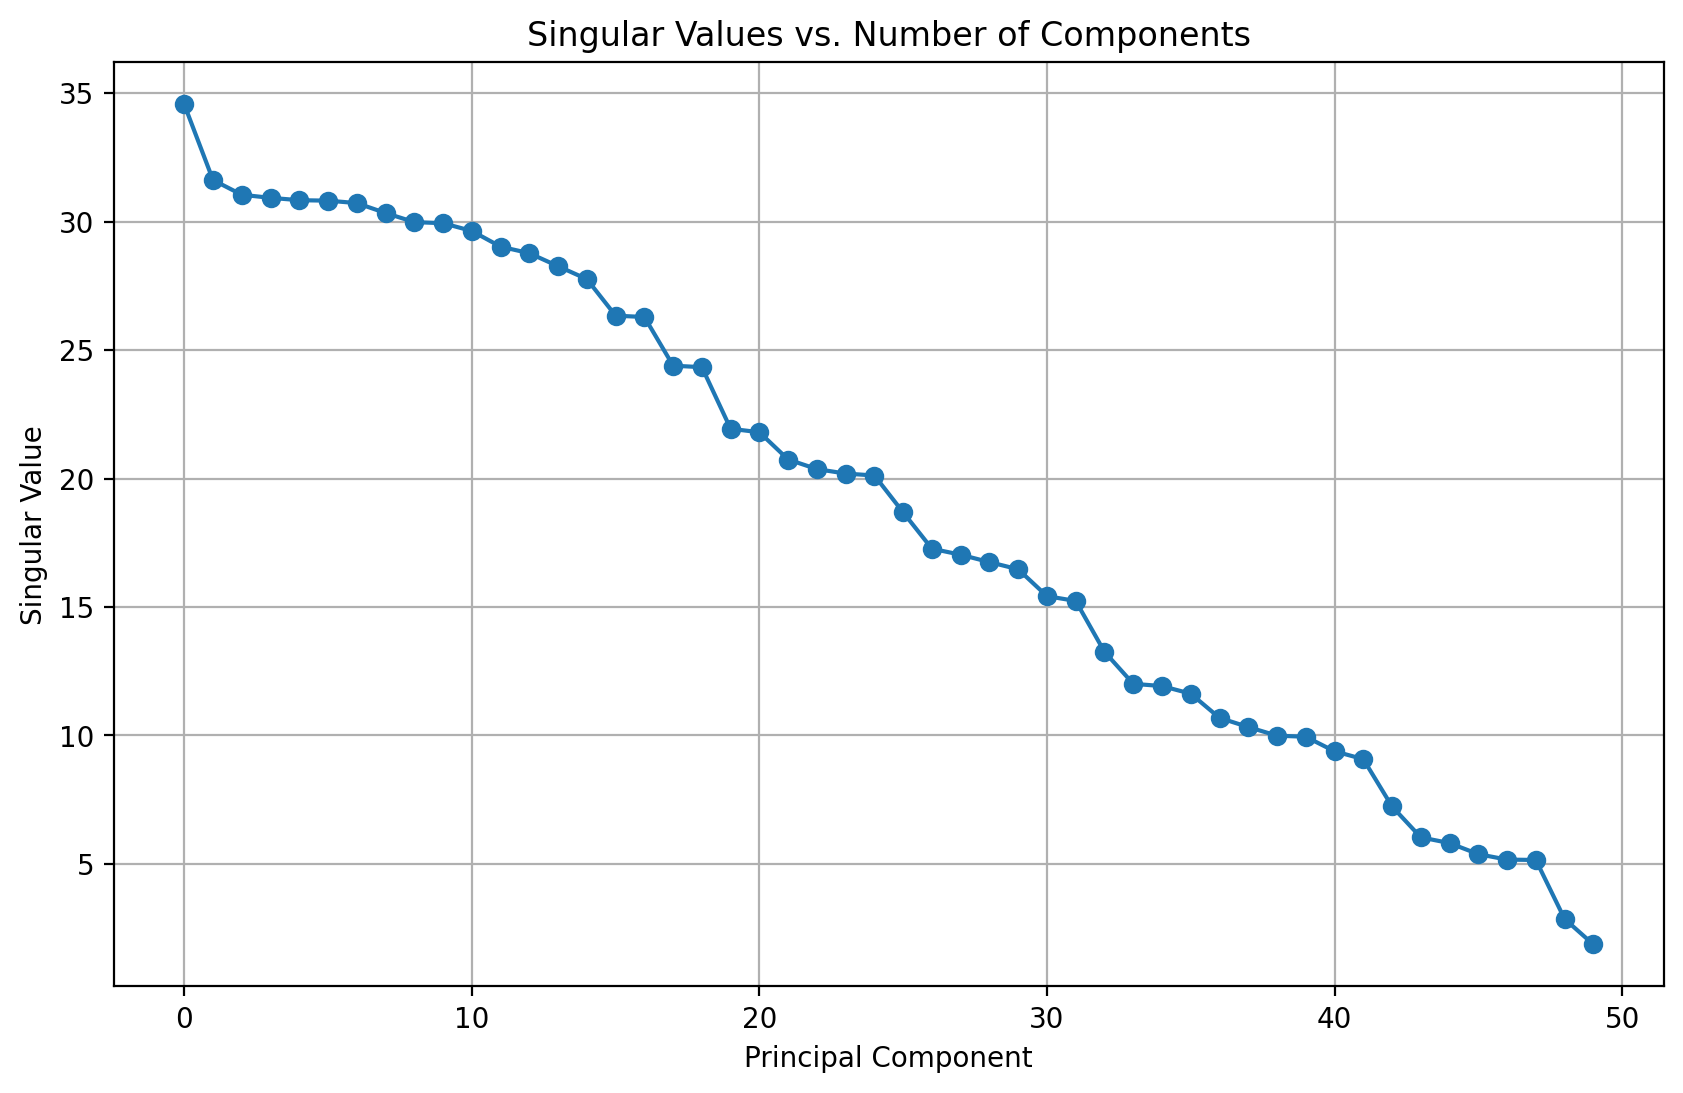

In [235]:
task_7.plot_singular_values()

In [246]:
experiment = ExperimentInfo(task_7, models)

In [247]:
experiment.auto_experiment()

Dataset num: 7
Total number of samples = 1000, features = 50
Train/test split ratio 0.6/0.4
Positive class ratio: 0.132
Positive class ration in train: 0.13166666666666665
Positive class ration in test: 0.1325
AUC = 0.5502147789679734, model = BalancedBagging
NUM = 53, model = GaussianNB
ASY1 = -3070, model = GaussianNB
ASY2 = -241, model = GaussianNB
Definetly worse models: 
['LogisticRegression', 'DecisionTree', 'RandomForest', 'Bagging', 'GradientBoosting', 'SVC_poly', 'BernoulliNB']


In [232]:
print(experiment.bad_models["Constant"]['test'])

-------------------------------------------------
ConstantClassifier
Evaluation mode: test
AUC: 0.5 
NUM: 53 
ASY1: -3070
ASY2: -241
-------------------------------------------------



Построим зависимость метрик то трешхолда для лучшей модели. Заметим, что они совпадают(за исключением auc) с моделью предсказывающей константу. Это скорее всего связано с трейн/тест сплитом

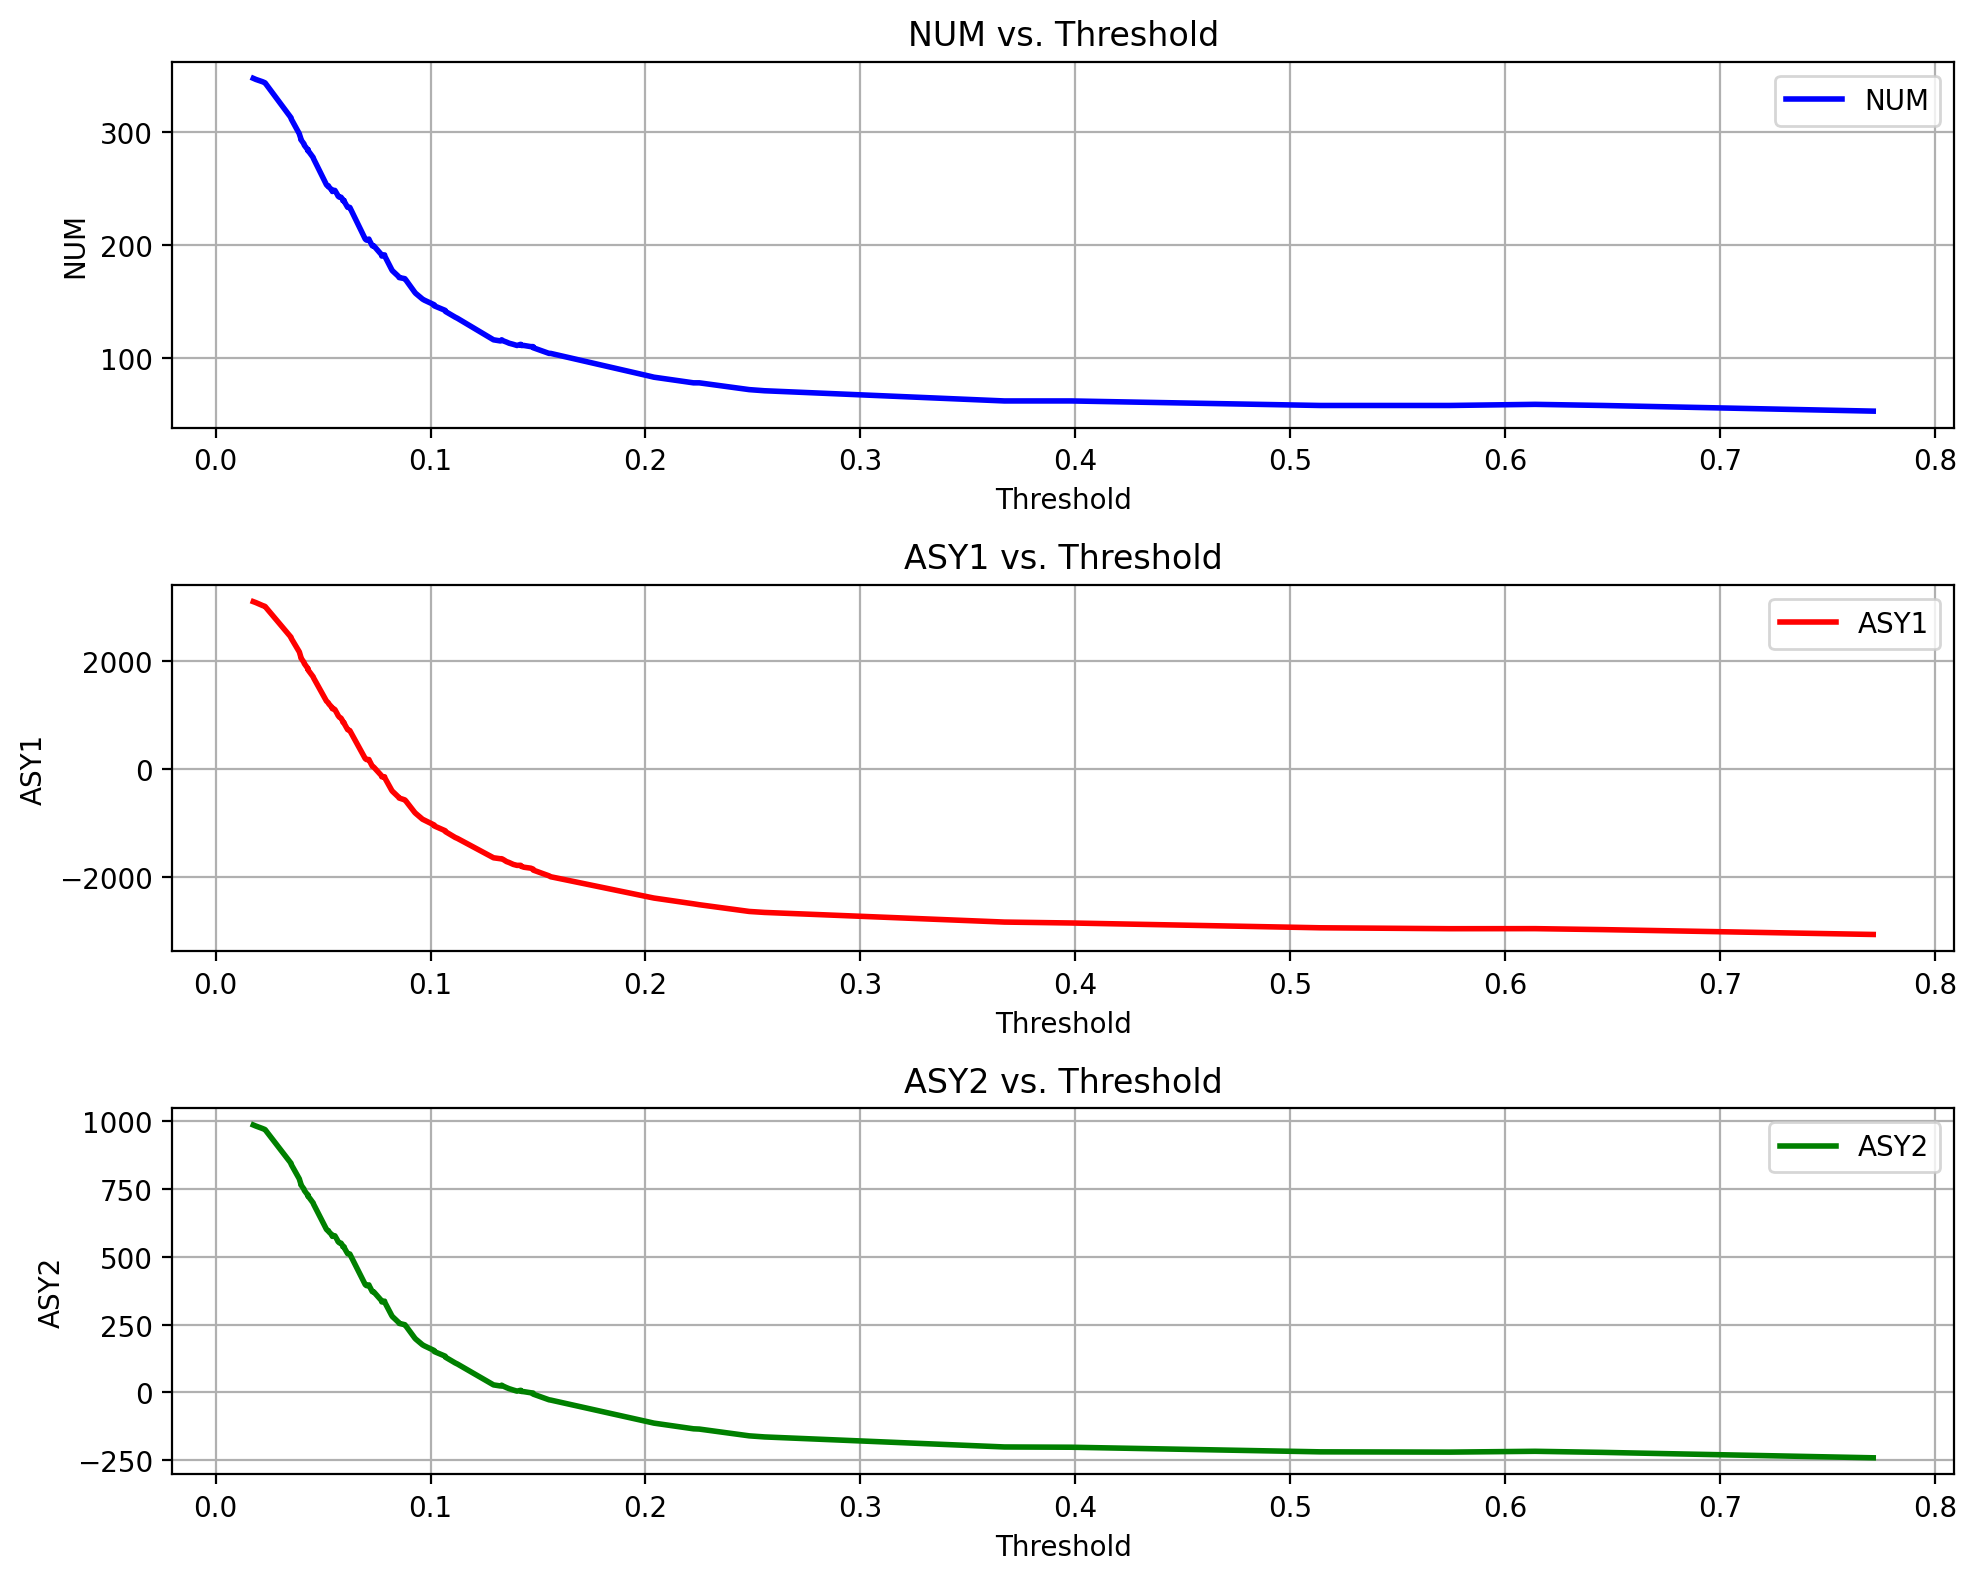

In [243]:
experiment.models['GradientBoosting']['test'].plot_thresholding_dependence()

Получается странная картина, выгодно всегда предсказывать константу. Попробуем воспользоваться техниками сэмплирования.

In [215]:
task_7.sample_train('ADASYN')

In [216]:
experiment.auto_experiment()

Dataset num: 7
Total number of samples = 1000, features = 50
Train/test split ratio 0.8/0.2
Positive class ratio: 0.132
Positive class ration in train: 0.1325
Positive class ration in test: 0.13
Resampling by ADASYN, positive class ratio in train now: 0.4926900584795322
AUC = 0.6149425287356322, model = GradientBoosting
NUM = 25, model = GradientBoosting
ASY1 = -1541, model = GradientBoosting
ASY2 = -125, model = GradientBoosting
Definetly worse models: 
['GaussianNB', 'LogisticRegression', 'DecisionTree', 'RandomForest', 'Bagging', 'SVC_linear', 'SVC_rbf', 'SVC_poly', 'SVC_sigmoid', 'Constant']


Лучше не стало...

# Датасет 5

In [248]:
task_5 = DatasetInfo(5)

Dataset num: 5
Total number of samples = 1000, features = 5000
Train/test split ratio 0.8/0.2
Positive class ratio: 0.373
Positive class ration in train: 0.3725
Positive class ration in test: 0.375



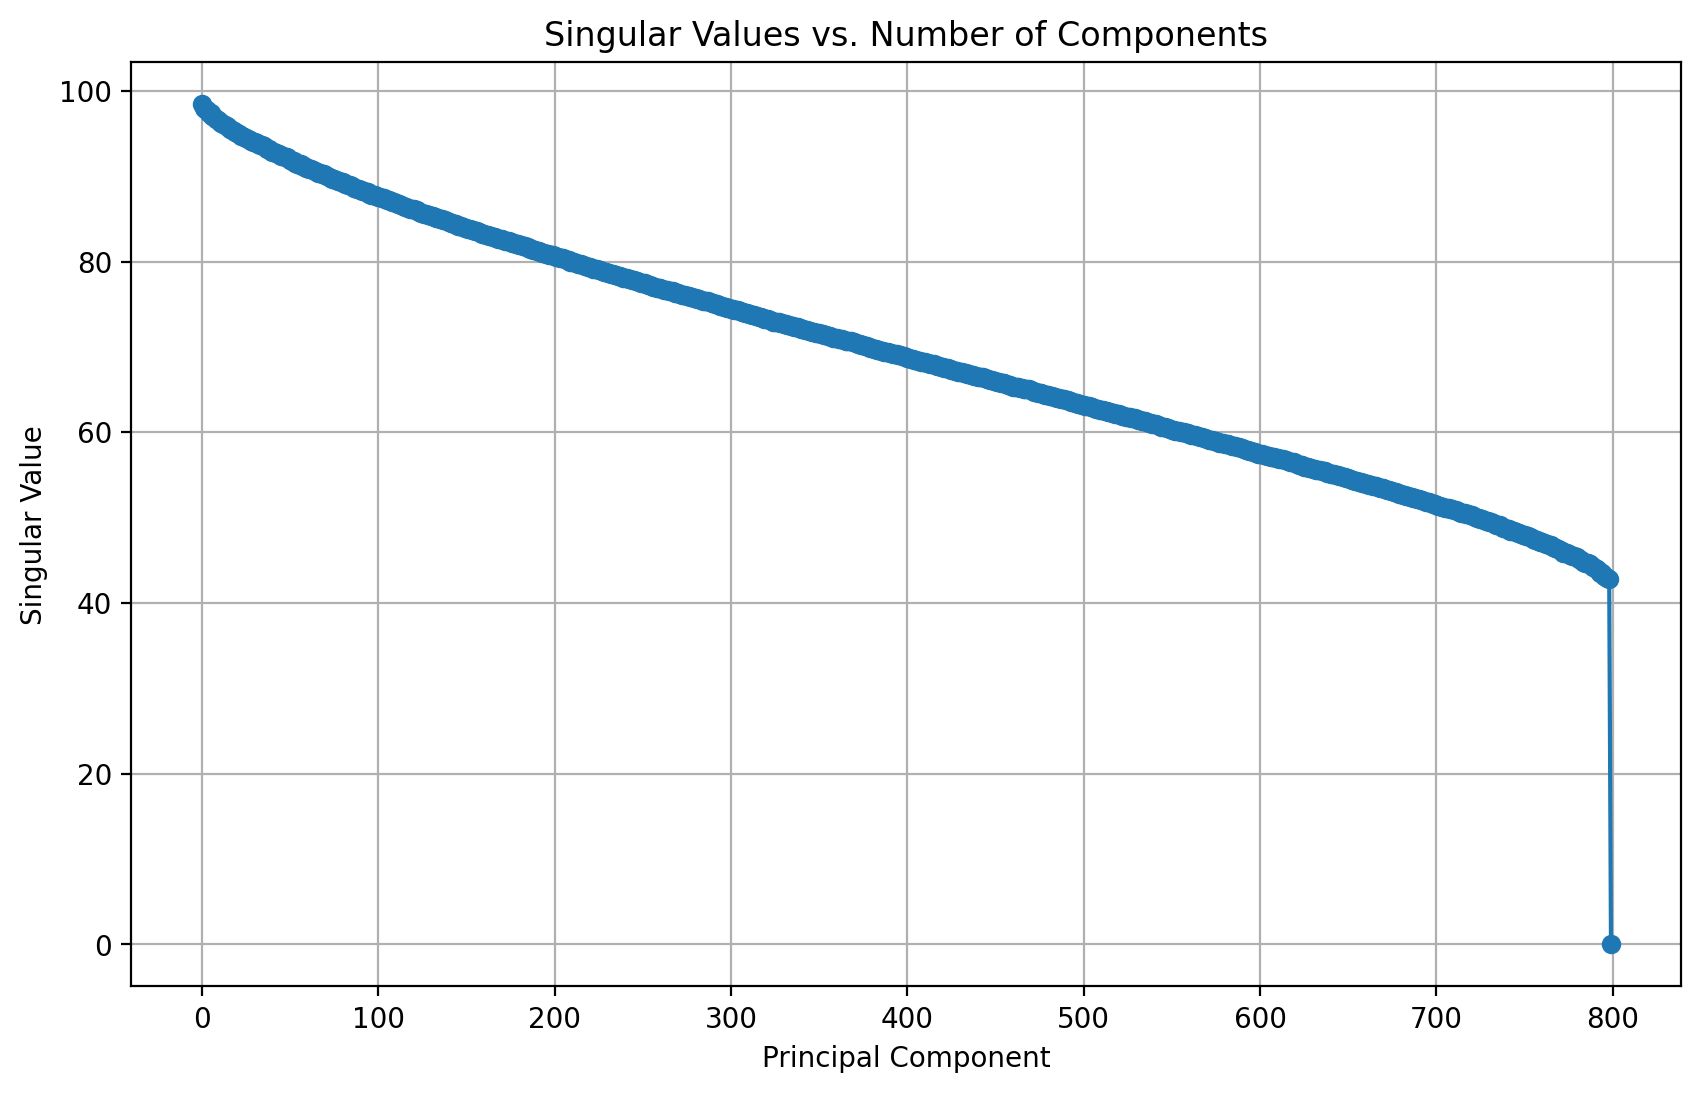

In [249]:
task_5.plot_singular_values()

In [252]:
experiment_5 = ExperimentInfo(task_5, models)

In [253]:
experiment_5.auto_experiment()

Dataset num: 5
Total number of samples = 1000, features = 5000
Train/test split ratio 0.8/0.2
Positive class ratio: 0.373
Positive class ration in train: 0.3725
Positive class ration in test: 0.375
AUC = 0.9337600000000001, model = GradientBoosting
NUM = 26, model = GradientBoosting
ASY1 = -1070, model = GradientBoosting
ASY2 = -107, model = Bagging
Definetly worse models: 
['GaussianNB', 'LogisticRegression', 'DecisionTree', 'RandomForest', 'BalancedBagging', 'SVC_linear', 'SVC_rbf', 'SVC_poly', 'SVC_sigmoid', 'Constant', 'BernoulliNB']


In [254]:
experiment_5.save_best_model()